Model: LogisticRegression
Accuracy: 0.6060
Precision: 0.3602
Recall: 0.2509
F1-score: 0.2958
ROC AUC: 0.5225837393909178
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73      2681
           1       0.36      0.25      0.30      1319

    accuracy                           0.61      4000
   macro avg       0.52      0.52      0.51      4000
weighted avg       0.57      0.61      0.58      4000



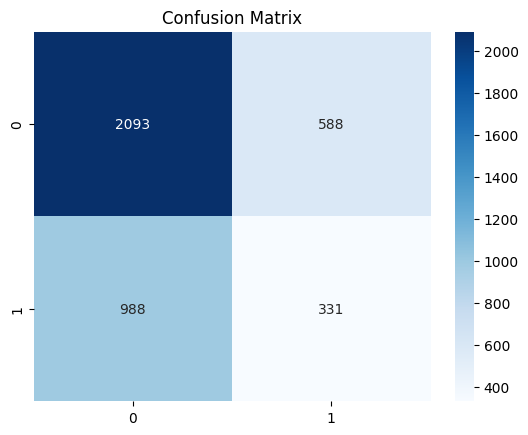

Model: SVC
Accuracy: 0.5220
Precision: 0.3486
Recall: 0.5178
F1-score: 0.4167
ROC AUC: 0.5351127285231569
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.52      0.60      2681
           1       0.35      0.52      0.42      1319

    accuracy                           0.52      4000
   macro avg       0.52      0.52      0.51      4000
weighted avg       0.58      0.52      0.54      4000



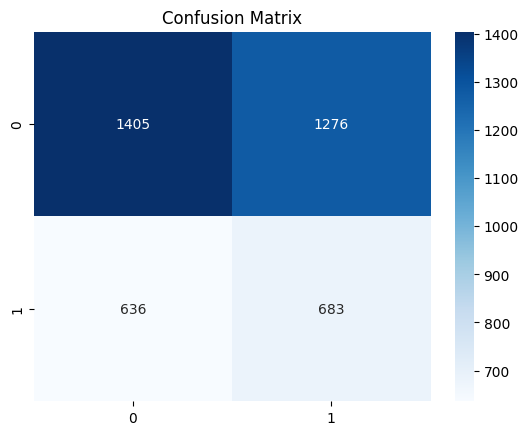

Model: DecisionTreeClassifier
Accuracy: 0.5270
Precision: 0.3510
Recall: 0.5118
F1-score: 0.4164
ROC AUC: 0.5496521869703943
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60      2681
           1       0.35      0.51      0.42      1319

    accuracy                           0.53      4000
   macro avg       0.52      0.52      0.51      4000
weighted avg       0.58      0.53      0.54      4000



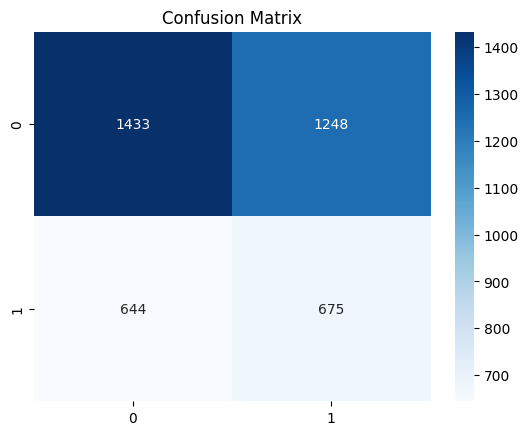

Model: RandomForestClassifier
Accuracy: 0.5262
Precision: 0.3512
Recall: 0.5155
F1-score: 0.4178
ROC AUC: 0.5506201645307345
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.53      0.60      2681
           1       0.35      0.52      0.42      1319

    accuracy                           0.53      4000
   macro avg       0.52      0.52      0.51      4000
weighted avg       0.58      0.53      0.54      4000



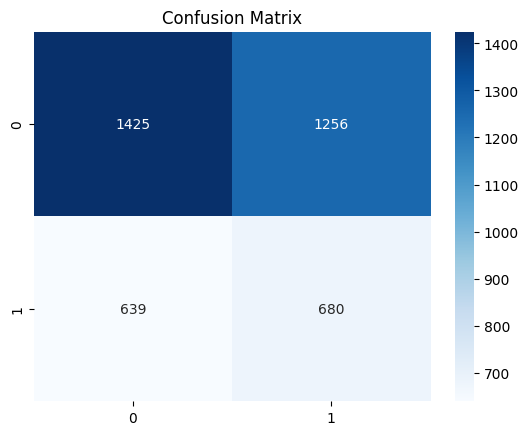

Model: KNeighborsClassifier
Accuracy: 0.6125
Precision: 0.3247
Recall: 0.1622
F1-score: 0.2164
ROC AUC: 0.4935569965717814
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.83      0.74      2681
           1       0.32      0.16      0.22      1319

    accuracy                           0.61      4000
   macro avg       0.50      0.50      0.48      4000
weighted avg       0.56      0.61      0.57      4000



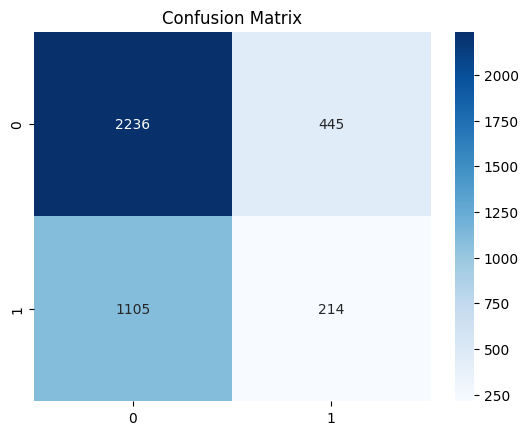

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

df = pd.read_csv("breast-level_annotations.csv")

df['breast_birads'] = df['breast_birads'].astype(str)
df['target'] = df['breast_birads'].apply(lambda x: 0 if x == 'BI-RADS 1' else 1)

features = ['height', 'width', 'breast_density', 'laterality', 'view_position']
X = df[features].copy()
y = df['target']

for col in ['breast_density', 'laterality', 'view_position']:
    X[col] = pd.Categorical(X[col]).codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

models = [
    LogisticRegression(random_state=42),
    SVC(kernel='rbf', C=1, probability=True),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(n_estimators=100, max_depth=6, random_state=42),
    KNeighborsClassifier(n_neighbors=3)
]

for model in models:
    train_and_evaluate(model, X_train, y_train, X_test, y_test)


In [ ]:
print(df['breast_birads'].unique())
print(df['breast_birads'].value_counts())


['BI-RADS 2' 'BI-RADS 1' 'BI-RADS 3' 'BI-RADS 4' 'BI-RADS 5']
breast_birads
BI-RADS 1    13406
BI-RADS 2     4676
BI-RADS 3      930
BI-RADS 4      762
BI-RADS 5      226
Name: count, dtype: int64


In [ ]:
print(df.groupby(['split', 'target']).size())


split     target
test      0          2682
          1          1318
training  0         10724
          1          5276
dtype: int64


In [ ]:
from google.colab import drive
import pandas as pd

df_metadata = pd.read_csv("metadata.csv")
df_findings = pd.read_csv("finding_annotations.csv")

print("Metadata.csv:")
print(df_metadata.head(), "\n")

print("Finding_annotations.csv:")
print(df_findings.head(), "\n")

print("Metadata Info:")
print(df_metadata.info(), "\n")

print("Findings Info:")
print(df_findings.info(), "\n")


Metadata.csv:
                   SOP Instance UID               Series Instance UID  \
0  d8125545210c08e1b1793a5af6458ee2  b36517b9cbbcfd286a7ae04f643af97a   
1  290c658f4e75a3f83ec78a847414297c  b36517b9cbbcfd286a7ae04f643af97a   
2  cd0fc7bc53ac632a11643ac4cc91002a  b36517b9cbbcfd286a7ae04f643af97a   
3  71638b1e853799f227492bfb08a01491  b36517b9cbbcfd286a7ae04f643af97a   
4  dd9ce3288c0773e006a294188aadba8e  d931832a0815df082c085b6e09d20aac   

                 SOP Instance UID.1 Patient's Age View Position  \
0  d8125545210c08e1b1793a5af6458ee2          053Y            CC   
1  290c658f4e75a3f83ec78a847414297c          053Y           MLO   
2  cd0fc7bc53ac632a11643ac4cc91002a          053Y            CC   
3  71638b1e853799f227492bfb08a01491          053Y           MLO   
4  dd9ce3288c0773e006a294188aadba8e          042Y            CC   

  Image Laterality Photometric Interpretation  Rows  Columns  \
0                L                MONOCHROME2  3518     2800   
1               

In [ ]:
print("Metadata columns:", df_metadata.columns)
print("Annotations columns:", df_annotations.columns)


Metadata columns: Index(['SOP Instance UID', 'Series Instance UID', 'Patient's Age',
       'View Position', 'Image Laterality', 'Photometric Interpretation',
       'Rows', 'Columns', 'Imager Pixel Spacing', 'Pixel Spacing',
       'Pixel Padding Value', 'Pixel Padding Range Limit', 'Window Center',
       'Window Width', 'Rescale Intercept', 'Rescale Slope', 'Rescale Type',
       'Window Center & Width Explanation', 'Manufacturer',
       'Manufacturer's Model Name'],
      dtype='object')
Annotations columns: Index(['study_id', 'series_id', 'image_id', 'laterality', 'view_position',
       'height', 'width', 'breast_birads', 'breast_density',
       'finding_categories', 'finding_birads', 'xmin', 'ymin', 'xmax', 'ymax',
       'split'],
      dtype='object')


In [ ]:
df_metadata['Patient\'s Age'] = df_metadata['Patient\'s Age'].apply(lambda x: int(x[:-1]) if isinstance(x, str) else x)

df_metadata['Patient\'s Age'] = df_metadata['Patient\'s Age'].fillna(df_metadata['Patient\'s Age'].mean())

df_metadata['View Position'] = df_metadata['View Position'].astype('category').cat.codes
df_metadata['Image Laterality'] = df_metadata['Image Laterality'].astype('category').cat.codes

df_findings['image_area'] = df_findings['height'] * df_findings['width']

df_findings['breast_density'] = df_findings['breast_density'].astype('category').cat.codes
df_findings['view_position'] = df_findings['view_position'].astype('category').cat.codes
df_findings['laterality'] = df_findings['laterality'].astype('category').cat.codes


df_combined = pd.merge(df_findings, df_metadata, left_on=['study_id', 'series_id'], right_on=['SOP Instance UID', 'Series Instance UID'], how='left')


df_combined = df_combined.drop(columns=['SOP Instance UID', 'Series Instance UID', 'study_id', 'image_id'])


print("Обработанные данные:")
print(df_combined.head())


Обработанные данные:
                          series_id  laterality  view_position  height  width  \
0  26de4993fa6b8ae50a91c8baf49b92b0           1              0    3518   2800   
1  26de4993fa6b8ae50a91c8baf49b92b0           1              1    3518   2800   
2  853b70e7e6f39133497909d9ca4c756d           1              0    3518   2800   
3  853b70e7e6f39133497909d9ca4c756d           1              1    3518   2800   
4  77619c914263eae44e9099f1ce07192c           1              0    3518   2800   

  breast_birads  breast_density            finding_categories finding_birads  \
0     BI-RADS 4               2                      ['Mass']      BI-RADS 4   
1     BI-RADS 4               2                      ['Mass']      BI-RADS 4   
2     BI-RADS 3               2          ['Global Asymmetry']      BI-RADS 3   
3     BI-RADS 3               2          ['Global Asymmetry']      BI-RADS 3   
4     BI-RADS 4               2  ['Architectural Distortion']      BI-RADS 4   

          x

In [ ]:

columns_to_drop = [
    'SOP Instance UID', 'Series Instance UID', 'study_id', 'image_id',
    'Pixel Padding Value', 'Window Center', 'Window Width', 'Rescale Intercept',
    'Rescale Slope', 'Rescale Type', 'Window Center & Width Explanation',
    'Manufacturer', "Manufacturer's Model Name"
]

columns_in_combined = [col for col in columns_to_drop if col in df_combined.columns]

df_combined = df_combined.drop(columns=columns_in_combined)

print(df_combined.head())


                          series_id  laterality  view_position  height  width  \
0  26de4993fa6b8ae50a91c8baf49b92b0           1              0    3518   2800   
1  26de4993fa6b8ae50a91c8baf49b92b0           1              1    3518   2800   
2  853b70e7e6f39133497909d9ca4c756d           1              0    3518   2800   
3  853b70e7e6f39133497909d9ca4c756d           1              1    3518   2800   
4  77619c914263eae44e9099f1ce07192c           1              0    3518   2800   

  breast_birads  breast_density            finding_categories         xmin  \
0     BI-RADS 4               2                      ['Mass']  2355.139893   
1     BI-RADS 4               2                      ['Mass']  2386.679932   
2     BI-RADS 3               2          ['Global Asymmetry']  2279.179932   
3     BI-RADS 3               2          ['Global Asymmetry']  1954.270020   
4     BI-RADS 4               2  ['Architectural Distortion']  2172.300049   

          ymin  ...  image_area  Patient's A

In [ ]:
# rand foret model test data
from sklearn.preprocessing import OneHotEncoder
import numpy as np


categorical_columns = X.select_dtypes(include=['object']).columns


encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_columns])


X_numerical = X.drop(columns=categorical_columns)
X_combined = np.hstack((X_numerical.values, X_encoded))


X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Accuracy: 0.9792581747193753
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3914
           1       0.95      0.57      0.71       184

    accuracy                           0.98      4098
   macro avg       0.96      0.78      0.85      4098
weighted avg       0.98      0.98      0.98      4098



In [ ]:
#rand forest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.impute import SimpleImputer

columns_to_drop = ['SOP Instance UID', 'Series Instance UID', 'study_id', 'image_id',
                   'Pixel Padding Value', 'Window Center', 'Window Width', 'Rescale Intercept',
                   'Rescale Slope', 'Rescale Type', 'Window Center & Width Explanation',
                   'Manufacturer', 'Manufacturer\'s Model Name', 'finding_birads']

columns_to_drop = [col for col in columns_to_drop if col in df_combined.columns]

df_combined = df_combined.drop(columns=columns_to_drop)

df_combined['target'] = df_combined['breast_birads'].apply(lambda x: 1 if '4' in x else 0)

X = df_combined.drop(columns=['target', 'breast_birads', 'finding_categories'])
y = df_combined['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numeric_columns = X.select_dtypes(exclude=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), numeric_columns),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
        ]), categorical_columns)
    ])

imbpipeline = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

imbpipeline.fit(X_train, y_train)

y_pred = imbpipeline.predict(X_test)

print("RandomForestClassifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ["Patient's Age" 'View Position' 'Image Laterality' 'Rows' 'Columns'
 'Pixel Padding Range Limit']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Photometric Interpretation' 'Imager Pixel Spacing' 'Pixel Spacing']. At least one non-missing value is needed for imputation with strategy='most_frequent'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ["Patient's Age" 'View Position' 'Image Laterality' 'Rows' 'Columns'
 'Pixel Padding Range Limit']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/

RandomForestClassifier
Accuracy: 0.9751098096632503
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3914
           1       0.67      0.88      0.76       184

    accuracy                           0.98      4098
   macro avg       0.83      0.93      0.87      4098
weighted avg       0.98      0.98      0.98      4098

